# Инструменты Data Science: анализ зарплат в IT

## День 2. Сравниваем зарплаты в Data Science. Что такое много? Что такое мало?

Продолжаем работать с данными о вакансиях в Data Science. У нас есть 360 наблюдений с зарплатами. Как понять во всем этом разнообразии, что такое много, а что такое мало? 

Для этого мы проводим EDA (exploratory data analysis, разведывательный анализ данных). Представьте, что вы детектив, который хочет раскрыть загадку. Данные – ваши свидетели, которых нужно "разговорить". Мы смотрим на тенденции, разброс наших данных, а также аномалии. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('DataScienceJobs.csv')
df.head()

,name,address,experience,skills,sal_from,sal_to
0,Начинающий специалист по работе с нейросетям,Санкт-Петербург,От 1 года до 3 лет,"Разработка технических заданий, Python, Сбор и...",55000,60000
1,Junior Data Engineer,Нижний Новгород,От 1 года до 3 лет,"SQL, jvm, Hadoop",150000,200000
2,ML-инженер,Москва,Нет опыта,"Знания математики, алгоритмов, структур данных...",150000,170000
3,Data Scientist,Москва,От 1 года до 3 лет,"Python, Machine Learning, Математическое модел...",180000,200000
4,Python Developer (Junior),Томск,От 1 года до 3 лет,"Python, Git, ООП, MySQL",60000,110000


В нашем наборе данных есть категориальные данные (name, address, experience, skills), а также количественные непрерывные данные (sal_from, sal_to).

С категориальными данными мы можем построить частотные таблицы, а также найти моду (самое часто встречаемое значение).

In [3]:
df['name'].value_counts() # построит частотную таблицу

name
Data Scientist                                       36
Data Engineer                                        18
Senior Data Scientist                                 8
Machine Learning Engineer                             6
ML Engineer                                           6
                                                     ..
MLOps/ML Инженер                                      1
Менеджер по управлению данными                        1
Data analyst                                          1
Computer Vision Engineer                              1
Автор дисциплины "Задачи NLP в машинном обучении"     1
Name: count, Length: 246, dtype: int64

In [4]:
df['name'].nunique() # посчитает количество уникальных названий вакансий в наборе

246

In [5]:
df['name'].mode() # самое часто встречающееся название вакансии, мода

0    Data Scientist
Name: name, dtype: object

Может показаться, что в общей выборке всего 36 вакансий дата-сайентистов. Но тут есть подвох. Во-первых, разные работодатели могут писать вакансии как с заглавных, так и со строчных букв. Для Python "Scientist" и "scientist" будут разными словами. Это исправляется приведением всех названий к одному регистру, а вот если название вакансии на русском (и в разных падежах), то это будет исправляться использованием регулярных выражений (на нашем курсе рассматривать не будем).

In [6]:
'Scientist' == 'scientist'

False

In [8]:
# найдем вакансии, в названии которых встречается Data Scientist или Data scientist или data scientist

df[(df['name'].str.contains('Data Scientist')) 
   | (df['name'].str.contains('Data scientist')) 
   | (df['name'].str.contains('data scientist'))].shape

(151, 6)

Во-вторых, Data Science – это очень широкая сфера, куда входят специалисты широкого профиля (дата-сайентисты), а также узкого профиля: ML (машинное обучение), NLP (обработка естественного языка), Computer Vision (компьютерное зрение) и другое.

<hr>

Посмотрим на города, в которых предлагают вакансии.

In [9]:
df['address'].value_counts()

address
Москва                188
Санкт-Петербург        40
Московская область     28
Новосибирск            27
Нижний Новгород        15
Екатеринбург           15
Казань                 15
Тюмень                 11
Томск                  10
Сочи                    8
Владивосток             2
Астрахань               1
Name: count, dtype: int64

In [10]:
df['address'].value_counts(normalize=True) * 100 # частотная таблица в процентах

address
Москва                52.222222
Санкт-Петербург       11.111111
Московская область     7.777778
Новосибирск            7.500000
Нижний Новгород        4.166667
Екатеринбург           4.166667
Казань                 4.166667
Тюмень                 3.055556
Томск                  2.777778
Сочи                   2.222222
Владивосток            0.555556
Астрахань              0.277778
Name: proportion, dtype: float64

Нарисуем очень простой график (визуализацией мы займемся чуть позже) для наглядности:

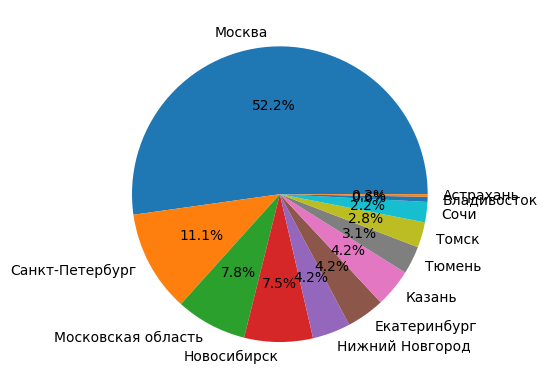

In [14]:
df['address'].value_counts().plot(kind='pie', label='', autopct='%1.1f%%');

<hr>

Посмотрим на требуемый опыт:

In [15]:
df['experience'].value_counts()

experience
От 3 до 6 лет         199
От 1 года до 3 лет    140
Более 6 лет            12
Нет опыта               9
Name: count, dtype: int64

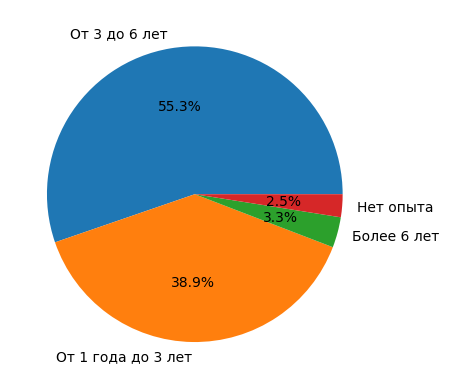

In [16]:
df['experience'].value_counts().plot(kind='pie', label='', autopct='%1.1f%%');

<hr>

А вот на навыки мы просто так не посмотрим!

In [17]:
df['skills'].value_counts()

skills
Python, SQL                                                                                                                                                                                                                                                                                                                                                                                                                                                            7
Python, Machine Learning, Linux                                                                                                                                                                                                                                                                                                                                                                                                                                        6
MS SQL, PostgreSQL, API, Базы данных, Техническая поддержка                    

В каждой ячейке есть целый список необходимых навыков. Давайте соберем их все в один список и посчитаем его частотность.

In [18]:
skills = df['skills'].str.cat(sep = ' ') # соединим все строки в одну строку через пробел

skills = skills.replace(',', '').replace(';', '') # удалим точки и точки с запятыми из строк

skills = skills.split() # разобьем строку на список слов по пробелу

skills = [skill for skill in skills if len(skill) > 2] # оставим только слова, в которых больше 2 букв

print(skills) # напечатаем список слов

['Разработка', 'технических', 'заданий', 'Python', 'Сбор', 'анализ', 'информации', 'Midjorney', 'Внедрение', 'нейросетей', 'Нейросеть', 'ChatGPT', 'Работа', 'команде', 'Обучение', 'развитие', 'Stabile', 'Diffusion', 'Работа', 'большим', 'объемом', 'информации', 'SQL', 'jvm', 'Hadoop', 'Знания', 'математики', 'алгоритмов', 'структур', 'данных', 'классического', 'CNN', 'YOLO', 'U-Net', 'ViT', 'Word2Vec', 'fasttext', 'RNN', 'трансформеры', 'Python', 'Linux', 'SQL', 'Git', 'PyTorch', 'TensorFlow', 'Python', 'Machine', 'Learning', 'Математическое', 'моделирование', 'Spark', 'Data', 'Science', 'Математическая', 'статистика', 'Python', 'Git', 'ООП', 'MySQL', 'Python', 'NLP', 'Artificial', 'intelligence', 'Искусственный', 'интеллект', 'Machine', 'Learning', 'Машинное', 'обучение', 'Обработка', 'естественного', 'языка', 'Data', 'science', 'Language', 'Processing', 'Natural', 'ООП', 'Большой', 'интерес', 'инновациям', 'области', 'медиа', 'технологий', 'Знание', 'рынка', 'существующих', 'нейронны

Чтобы сделать частотный анализ, мы будем использовать библиотеку `collections`, в которой есть очень удобный класс `Counter`, делающий частотный анализ.

In [19]:
from collections import Counter

In [20]:
Counter(skills).most_common(15) # 15 самых часто встречающихся слов

[('Python', 252),
 ('SQL', 163),
 ('данных', 90),
 ('Data', 82),
 ('Learning', 67),
 ('Machine', 60),
 ('работы', 54),
 ('PyTorch', 47),
 ('NLP', 45),
 ('Spark', 41),
 ('Опыт', 39),
 ('Hadoop', 38),
 ('опыт', 37),
 ('Pandas', 33),
 ('Big', 33)]

Конечно же на первом месте Python, а на втором SQL. Далее видим работу с данными ("данных", "Data") и машинное обучение. \
PyTorch – это библиотека Python для машинного обучения. \
NLP – это обработка естественного языка. \
Spark – это фреймворк для обработки и анализа больших объёмов информации.

Кстати, если вы посмотрите на содержание магистратуры [Master of Data Science](https://www.hse.ru/ma/mds/about), то вы увидите там курсы, которые дают знания для всех наиболее востребованных навыков Data Science, чтобы быть востребованным специалистом.

<hr>

А теперь самое интересное! Зарплаты!

Для количественных непрерывных данных сначала строят гистограмму (это способ представления данных, где количественные соотношения показателя представлены в виде прямоугольников, площади которых пропорциональны). Не путать с столбчатой диаграммой!

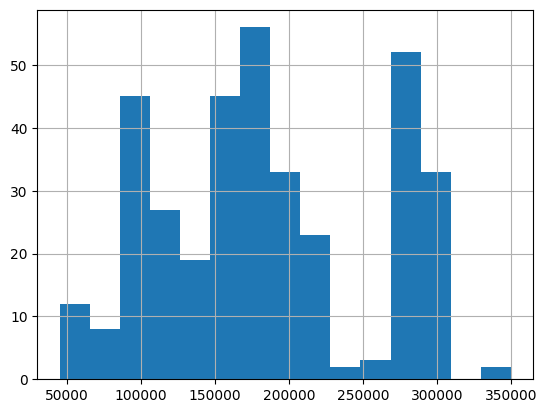

In [21]:
df['sal_from'].hist(bins=15);

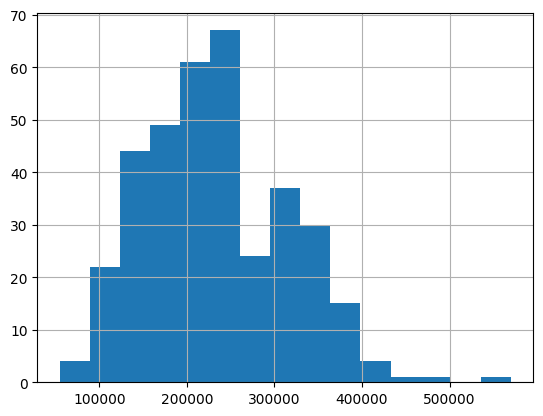

In [22]:
df['sal_to'].hist(bins=15);

Большой разброс данных! Давайте посмотрим на описательные статистики с помощью метода `.describe()`.

* **count** – число непустых (заполненных) значений
* **mean** – среднее арифметическое
* **std** – стандартное отклонение (показатель разброса данных относительно среднего значения)
* **min** – минимальное значение
* **max** – максимальное значение
* **25%** – нижний квартиль (значение, которое 25% значений не превышают)
* **50%** – медиана (значение, которое 50% значений не превышают)
* **75%** – верхний квартиль (значение, которое 75% значений не превышают)

In [26]:
df.describe()

,sal_from,sal_to
count,360.000000,360.000000
mean,182694.444444,231416.666667
std,70581.279109,79938.651617
min,45000.000000,55000.000000
25%,120000.000000,170000.000000
50%,180000.000000,225000.000000
75%,242500.000000,290000.000000
max,350000.000000,570000.000000


Нижняя вилка зарплаты (sal_from) колеблется от 45000 до 350000 рублей, в то время как верхняя вилка (sal_to) изменяется от 55000 до 570000 (!) рублей. Средние зарплаты для Data Science – 182694 рубля (для sal_from) и 231417 рублей (для sal_to). 

Стандартное отклонение значительное: 70581 рубля для sal_from и 79939 рублей для sal_to, что свидетельствует о значительной вариативности в зарплатах (много условий, разные города, навыки, требуемый опыт). 

Посмотрим на наши данные с помощью еще одного графического формата.

Ящик с усами (box plot) - это графическое представление данных, которое позволяет визуально оценить распределение значений и выявить наличие выбросов (аномальных значений, не типичных для всего набора данных).

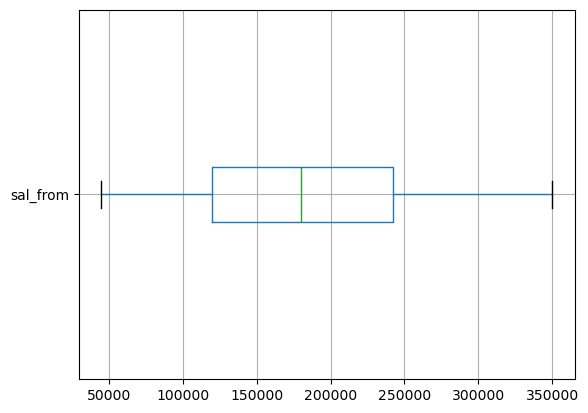

In [72]:
df.boxplot('sal_from', vert=False); # выбросов нет

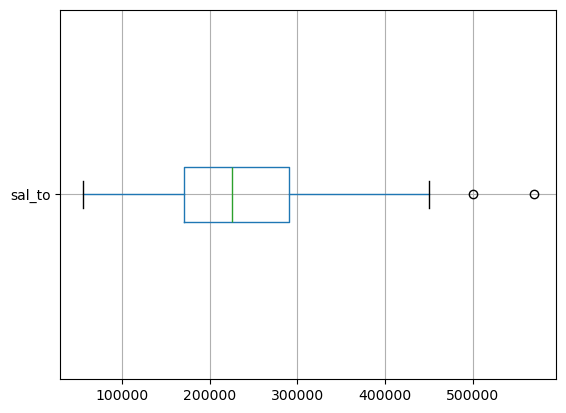

In [73]:
df.boxplot('sal_to', vert=False); # есть два аномальных значения

За ML-специалистов с опытом работы от 3-х лет готовы платить до 500-570 тысяч рублей!

In [76]:
df[df['sal_to'] >= 500000]

,name,address,experience,skills,sal_from,sal_to
9,Senior Machine Learning Engineer,Москва,От 3 до 6 лет,"Machine Learning, Python, numpy, pandas, matpl...",350000,570000
320,Senior MLE/DS в команду рекомендаций,Москва,От 3 до 6 лет,"ML (GBDT, LR), Kotlin",300000,500000


Давайте еще посмотрим на распределение зарплат в зависимости от требуемого уровня опыта. Для упрощения задачи будем смотреть по нижней границе вилки. Попробуйте самостоятельно проинтерпретировать эти графики.

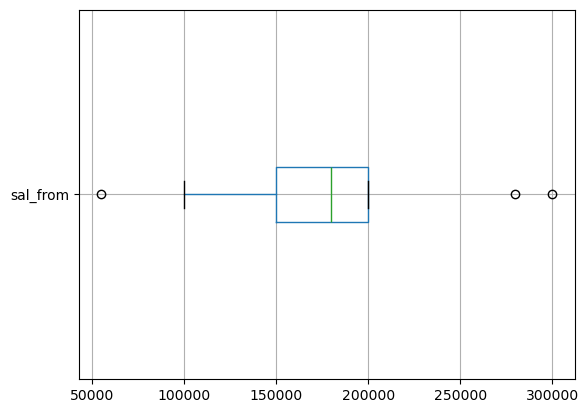

In [100]:
df[df['experience'] == 'Нет опыта'].boxplot('sal_from', vert=False);

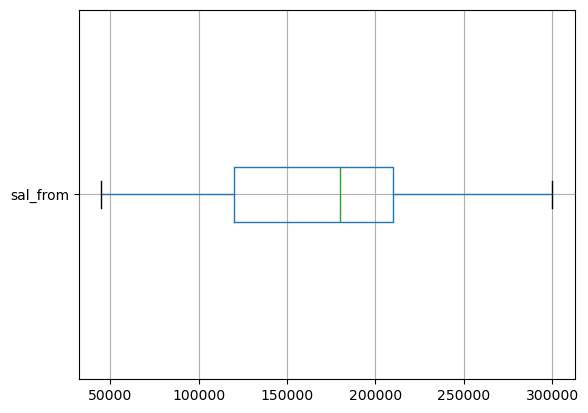

In [80]:
df[df['experience'] == 'От 1 года до 3 лет'].boxplot('sal_from', vert=False);

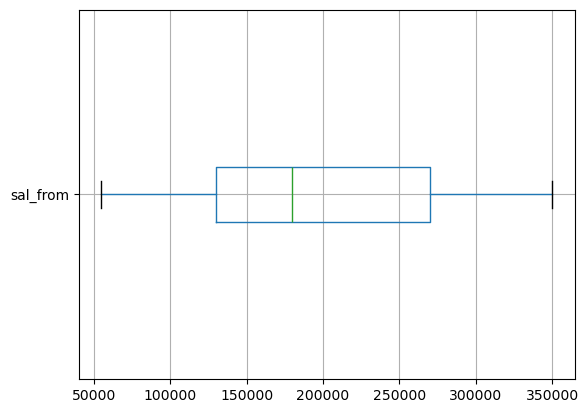

In [83]:
df[df['experience'] == 'От 3 до 6 лет'].boxplot('sal_from', vert=False);

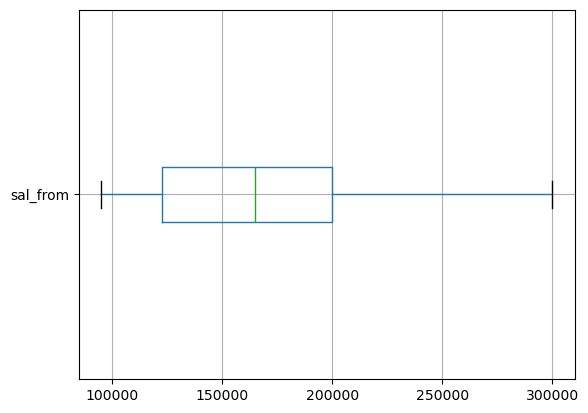

In [84]:
df[df['experience'] == 'Более 6 лет'].boxplot('sal_from', vert=False);